In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-06 07:21:09.444287


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1117.7324)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 32


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.2621)tensor(6.6452)tensor(4.1889)tensor(4.0862)tensor(3.3755)tensor(2.7698)tensor(6.5936)tensor(3.2533)tensor(3.3771)tensor(3.4203)tensor(5.7446)tensor(3.0737)tensor(3.4739)tensor(4.3558)tensor(3.6484)tensor(3.9607)tensor(5.9470)tensor(2.9305)tensor(3.2794)tensor(4.2455)tensor(8.7165)tensor(4.2930)tensor(5.9799)tensor(4.4537)tensor(6.8111)tensor(7.1291)tensor(4.4072)tensor(6.3866)tensor(6.6811)tensor(5.8703)tensor(6.8926)tensor(6.8138)tensor(7.6306)tensor(6.1779)tensor(4.2049)tensor(3.1644)tensor(6.6341)tensor(7.5226)tensor(4.4436)tensor(5.5293)tensor(3.0883)tensor(4.7125)tensor(6.6783)tensor(3.1289)tensor(4.6613)tensor(3.5377)tensor(8.9644)tensor(7.9587)tensor(9.2126)tensor(6.8526)tensor(2.8375)tensor(4.4210)tensor(5.1315)tensor(3.2673)tensor(6.2493)tensor(4.3685)tensor(4.5393)tensor(4.5347)tensor(6.2648)tensor(6.9790)tensor(3.1334)tensor(4.9115)tensor(5.6589)tensor(7.2076)tensor(6.1101)tensor(3.6263)tensor(3.1899)tensor(3.4396)tensor(3.2112)tensor(5.3168)tensor(3.1958)tensor

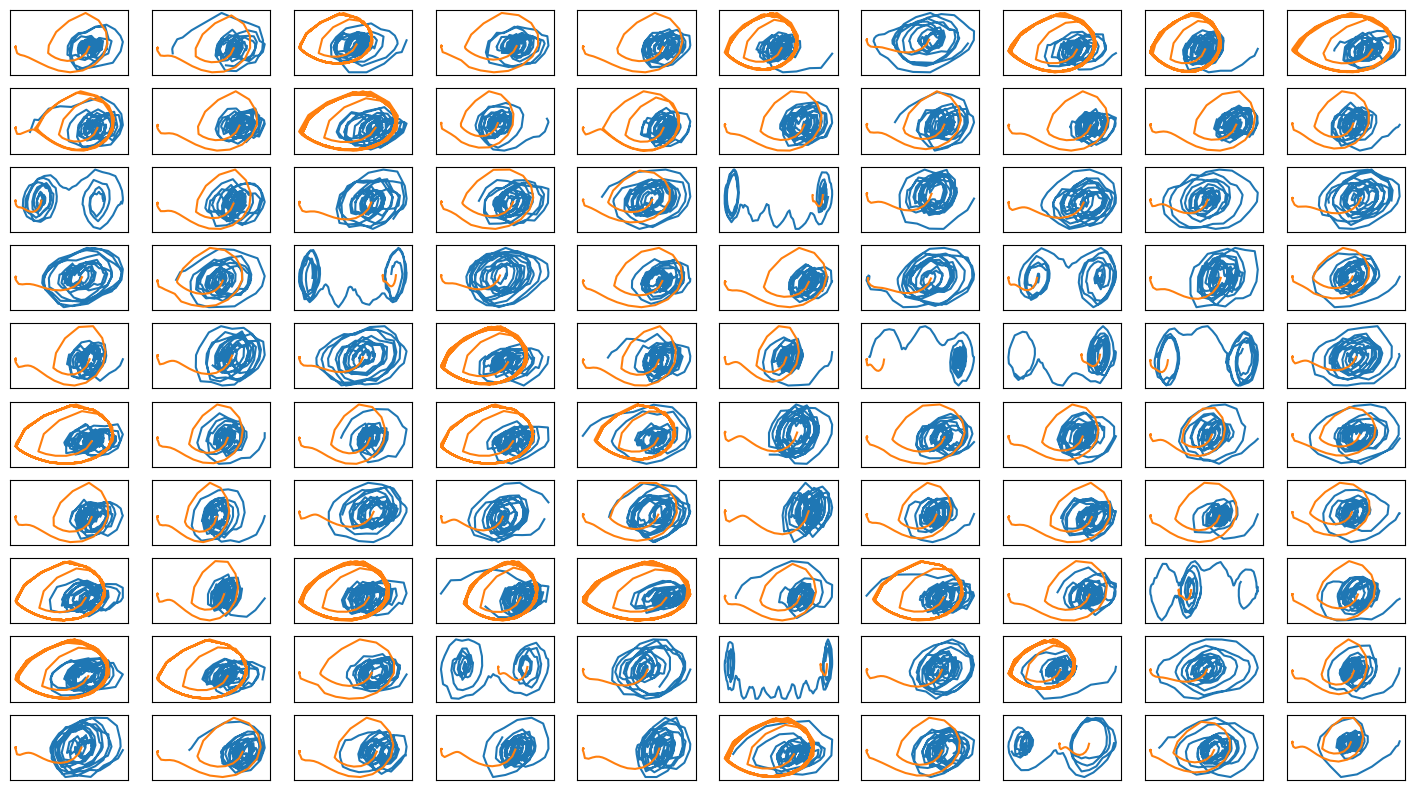

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 610.83319  validloss 557.37820±0.00000  bestvalidloss 557.37820  last_update 0
train: iter 1  trainloss 403.89148  validloss 422.40425±0.00000  bestvalidloss 422.40425  last_update 0
train: iter 2  trainloss 1031.12465  validloss 286.16810±0.00000  bestvalidloss 286.16810  last_update 0
train: iter 3  trainloss 360.69221  validloss 323.10550±0.00000  bestvalidloss 286.16810  last_update 1
train: iter 4  trainloss 333.45135  validloss 311.05372±0.00000  bestvalidloss 286.16810  last_update 2
train: iter 5  trainloss 314.17182  validloss 289.93961±0.00000  bestvalidloss 286.16810  last_update 3
train: iter 6  trainloss 298.18704  validloss 270.36339±0.00000  bestvalidloss 270.36339  last_update 0
train: iter 7  trainloss 280.45746  validloss 252.96914±0.00000  bestvalidloss 252.96914  last_update 0
train: iter 8  trainloss 263.11654  validloss 232.48166±0.00000  bestvalidloss 232.48166  last_update 0
train: iter 9  trainloss 243.77074  validlos

train: iter 77  trainloss -555.04336  validloss -705.62746±0.00000  bestvalidloss -756.21653  last_update 1
train: iter 78  trainloss -585.82200  validloss -707.19527±0.00000  bestvalidloss -756.21653  last_update 2
train: iter 79  trainloss -588.54779  validloss -690.27236±0.00000  bestvalidloss -756.21653  last_update 3
train: iter 80  trainloss -581.91578  validloss -735.71021±0.00000  bestvalidloss -756.21653  last_update 4
train: iter 81  trainloss -560.02103  validloss -764.39333±0.00000  bestvalidloss -764.39333  last_update 0
train: iter 82  trainloss -565.28273  validloss -762.01661±0.00000  bestvalidloss -764.39333  last_update 1
train: iter 83  trainloss -579.99490  validloss -760.65766±0.00000  bestvalidloss -764.39333  last_update 2
train: iter 84  trainloss -581.22293  validloss -761.43415±0.00000  bestvalidloss -764.39333  last_update 3
train: iter 85  trainloss -587.99042  validloss -728.86323±0.00000  bestvalidloss -764.39333  last_update 4
train: iter 86  trainloss -5

train: iter 154  trainloss -653.65351  validloss -811.62760±0.00000  bestvalidloss -827.70515  last_update 24
train: iter 155  trainloss -646.55746  validloss -820.22716±0.00000  bestvalidloss -827.70515  last_update 25
train: iter 156  trainloss -637.61992  validloss -779.74005±0.00000  bestvalidloss -827.70515  last_update 26
train: iter 157  trainloss -651.11222  validloss -796.83369±0.00000  bestvalidloss -827.70515  last_update 27
train: iter 158  trainloss -652.59968  validloss -815.79435±0.00000  bestvalidloss -827.70515  last_update 28
train: iter 159  trainloss -628.56337  validloss -839.58300±0.00000  bestvalidloss -839.58300  last_update 0
train: iter 160  trainloss -627.09961  validloss -797.43744±0.00000  bestvalidloss -839.58300  last_update 1
train: iter 161  trainloss -624.41990  validloss -824.92112±0.00000  bestvalidloss -839.58300  last_update 2
train: iter 162  trainloss -633.37397  validloss -765.89491±0.00000  bestvalidloss -839.58300  last_update 3
train: iter 16

train: iter 229  trainloss -671.09011  validloss -842.59276±0.00000  bestvalidloss -852.41019  last_update 13
train: iter 230  trainloss -671.89718  validloss -840.80021±0.00000  bestvalidloss -852.41019  last_update 14
train: iter 231  trainloss -677.41861  validloss -763.30838±0.00000  bestvalidloss -852.41019  last_update 15
train: iter 232  trainloss -677.00351  validloss -838.43152±0.00000  bestvalidloss -852.41019  last_update 16
train: iter 233  trainloss -684.56003  validloss -825.86874±0.00000  bestvalidloss -852.41019  last_update 17
train: iter 234  trainloss -655.12867  validloss -838.35990±0.00000  bestvalidloss -852.41019  last_update 18
train: iter 235  trainloss -673.22303  validloss -817.50511±0.00000  bestvalidloss -852.41019  last_update 19
train: iter 236  trainloss -654.89866  validloss -815.65637±0.00000  bestvalidloss -852.41019  last_update 20
train: iter 237  trainloss 27.63135  validloss -824.19211±0.00000  bestvalidloss -852.41019  last_update 21
train: iter 

train: iter 304  trainloss -672.90111  validloss -851.87195±0.00000  bestvalidloss -865.72116  last_update 23
train: iter 305  trainloss -680.90417  validloss -829.53079±0.00000  bestvalidloss -865.72116  last_update 24
train: iter 306  trainloss -694.66431  validloss -852.53929±0.00000  bestvalidloss -865.72116  last_update 25
train: iter 307  trainloss -682.13602  validloss -836.58296±0.00000  bestvalidloss -865.72116  last_update 26
train: iter 308  trainloss -695.73918  validloss -805.04268±0.00000  bestvalidloss -865.72116  last_update 27
train: iter 309  trainloss -698.68434  validloss -874.62914±0.00000  bestvalidloss -874.62914  last_update 0
train: iter 310  trainloss -687.48346  validloss -855.14586±0.00000  bestvalidloss -874.62914  last_update 1
train: iter 311  trainloss 38.76367  validloss -871.59450±0.00000  bestvalidloss -874.62914  last_update 2
train: iter 312  trainloss -375.37790  validloss -190.13904±0.00000  bestvalidloss -874.62914  last_update 3
train: iter 313 

train: iter 379  trainloss -711.16137  validloss -874.53246±0.00000  bestvalidloss -885.13161  last_update 10
train: iter 380  trainloss -716.65905  validloss -855.64824±0.00000  bestvalidloss -885.13161  last_update 11
train: iter 381  trainloss -703.84676  validloss -844.69971±0.00000  bestvalidloss -885.13161  last_update 12
train: iter 382  trainloss -709.33676  validloss -832.35281±0.00000  bestvalidloss -885.13161  last_update 13
train: iter 383  trainloss -712.05944  validloss -848.60713±0.00000  bestvalidloss -885.13161  last_update 14
train: iter 384  trainloss -714.50498  validloss -837.43199±0.00000  bestvalidloss -885.13161  last_update 15
train: iter 385  trainloss -692.70185  validloss -874.91377±0.00000  bestvalidloss -885.13161  last_update 16
train: iter 386  trainloss -684.69366  validloss -873.19444±0.00000  bestvalidloss -885.13161  last_update 17
train: iter 387  trainloss -684.23205  validloss -869.21635±0.00000  bestvalidloss -885.13161  last_update 18
train: ite

train: iter 454  trainloss -722.42840  validloss -883.50750±0.00000  bestvalidloss -899.23564  last_update 7
train: iter 455  trainloss -719.15267  validloss -855.29113±0.00000  bestvalidloss -899.23564  last_update 8
train: iter 456  trainloss -701.86401  validloss -870.00279±0.00000  bestvalidloss -899.23564  last_update 9
train: iter 457  trainloss -715.23283  validloss -842.48010±0.00000  bestvalidloss -899.23564  last_update 10
train: iter 458  trainloss -712.97408  validloss -882.02434±0.00000  bestvalidloss -899.23564  last_update 11
train: iter 459  trainloss -726.42069  validloss -846.02899±0.00000  bestvalidloss -899.23564  last_update 12
train: iter 460  trainloss -725.69512  validloss -869.79166±0.00000  bestvalidloss -899.23564  last_update 13
train: iter 461  trainloss -718.18952  validloss -895.45283±0.00000  bestvalidloss -899.23564  last_update 14
train: iter 462  trainloss -718.90561  validloss -887.45827±0.00000  bestvalidloss -899.23564  last_update 15
train: iter 4

train: iter 529  trainloss -717.02573  validloss -810.89283±0.00000  bestvalidloss -899.23564  last_update 82
train: iter 530  trainloss -717.92019  validloss -815.28140±0.00000  bestvalidloss -899.23564  last_update 83
train: iter 531  trainloss -726.61866  validloss -904.81667±0.00000  bestvalidloss -904.81667  last_update 0
train: iter 532  trainloss -718.08044  validloss -816.72698±0.00000  bestvalidloss -904.81667  last_update 1
train: iter 533  trainloss -732.97835  validloss -880.16213±0.00000  bestvalidloss -904.81667  last_update 2
train: iter 534  trainloss -738.00192  validloss -873.00893±0.00000  bestvalidloss -904.81667  last_update 3
train: iter 535  trainloss -627.86179  validloss -845.84322±0.00000  bestvalidloss -904.81667  last_update 4
train: iter 536  trainloss -696.17086  validloss -854.09352±0.00000  bestvalidloss -904.81667  last_update 5
train: iter 537  trainloss -715.35869  validloss -861.29069±0.00000  bestvalidloss -904.81667  last_update 6
train: iter 538  

train: iter 604  trainloss -722.16447  validloss -885.53286±0.00000  bestvalidloss -908.29973  last_update 17
train: iter 605  trainloss -723.26621  validloss -856.91704±0.00000  bestvalidloss -908.29973  last_update 18
train: iter 606  trainloss -735.10648  validloss -895.37840±0.00000  bestvalidloss -908.29973  last_update 19
train: iter 607  trainloss -732.71728  validloss -898.89716±0.00000  bestvalidloss -908.29973  last_update 20
train: iter 608  trainloss -712.67300  validloss -876.17521±0.00000  bestvalidloss -908.29973  last_update 21
train: iter 609  trainloss -713.25884  validloss -838.36076±0.00000  bestvalidloss -908.29973  last_update 22
train: iter 610  trainloss -741.41726  validloss -891.51226±0.00000  bestvalidloss -908.29973  last_update 23
train: iter 611  trainloss -746.17921  validloss -893.68698±0.00000  bestvalidloss -908.29973  last_update 24
train: iter 612  trainloss -739.58318  validloss -900.53779±0.00000  bestvalidloss -908.29973  last_update 25
train: ite

train: iter 680  trainloss -734.72029  validloss -883.20942±0.00000  bestvalidloss -913.24194  last_update 8
train: iter 681  trainloss -724.85275  validloss -852.66937±0.00000  bestvalidloss -913.24194  last_update 9
train: iter 682  trainloss -746.44205  validloss -907.03411±0.00000  bestvalidloss -913.24194  last_update 10
train: iter 683  trainloss -744.07065  validloss -878.12706±0.00000  bestvalidloss -913.24194  last_update 11
train: iter 684  trainloss -756.13678  validloss -894.22837±0.00000  bestvalidloss -913.24194  last_update 12
train: iter 685  trainloss -750.44655  validloss -920.26882±0.00000  bestvalidloss -920.26882  last_update 0
train: iter 686  trainloss -746.11779  validloss -856.86904±0.00000  bestvalidloss -920.26882  last_update 1
train: iter 687  trainloss -750.23225  validloss -896.36252±0.00000  bestvalidloss -920.26882  last_update 2
train: iter 688  trainloss -749.69360  validloss -910.43417±0.00000  bestvalidloss -920.26882  last_update 3
train: iter 689 

train: iter 756  trainloss -758.83030  validloss -905.91814±0.00000  bestvalidloss -924.91259  last_update 53
train: iter 757  trainloss -757.15116  validloss -920.76743±0.00000  bestvalidloss -924.91259  last_update 54
train: iter 758  trainloss -751.93865  validloss -902.98545±0.00000  bestvalidloss -924.91259  last_update 55
train: iter 759  trainloss -750.44594  validloss -867.38709±0.00000  bestvalidloss -924.91259  last_update 56
train: iter 760  trainloss -758.28913  validloss -877.49160±0.00000  bestvalidloss -924.91259  last_update 57
train: iter 761  trainloss -744.90951  validloss -768.72138±0.00000  bestvalidloss -924.91259  last_update 58
train: iter 762  trainloss -756.60151  validloss -904.24887±0.00000  bestvalidloss -924.91259  last_update 59
train: iter 763  trainloss -758.13565  validloss -913.08893±0.00000  bestvalidloss -924.91259  last_update 60
train: iter 764  trainloss -753.91021  validloss -836.23385±0.00000  bestvalidloss -924.91259  last_update 61
train: ite

train: iter 831  trainloss -758.61548  validloss -918.93369±0.00000  bestvalidloss -928.43400  last_update 56
train: iter 832  trainloss -768.27666  validloss -926.12534±0.00000  bestvalidloss -928.43400  last_update 57
train: iter 833  trainloss -759.05935  validloss -841.52921±0.00000  bestvalidloss -928.43400  last_update 58
train: iter 834  trainloss -766.68219  validloss -886.90302±0.00000  bestvalidloss -928.43400  last_update 59
train: iter 835  trainloss -766.36816  validloss -908.14529±0.00000  bestvalidloss -928.43400  last_update 60
train: iter 836  trainloss -765.87987  validloss -889.14377±0.00000  bestvalidloss -928.43400  last_update 61
train: iter 837  trainloss -769.05799  validloss -898.44576±0.00000  bestvalidloss -928.43400  last_update 62
train: iter 838  trainloss -762.04247  validloss -911.15778±0.00000  bestvalidloss -928.43400  last_update 63
train: iter 839  trainloss -667.00275  validloss -896.23084±0.00000  bestvalidloss -928.43400  last_update 64
train: ite

train: iter 906  trainloss -767.79965  validloss -907.33585±0.00000  bestvalidloss -932.92780  last_update 5
train: iter 907  trainloss -768.25465  validloss -887.79441±0.00000  bestvalidloss -932.92780  last_update 6
train: iter 908  trainloss -758.66434  validloss -890.50500±0.00000  bestvalidloss -932.92780  last_update 7
train: iter 909  trainloss -763.86471  validloss -887.44707±0.00000  bestvalidloss -932.92780  last_update 8
train: iter 910  trainloss -768.39473  validloss -904.72427±0.00000  bestvalidloss -932.92780  last_update 9
train: iter 911  trainloss -766.61305  validloss -916.67776±0.00000  bestvalidloss -932.92780  last_update 10
train: iter 912  trainloss -756.20676  validloss -934.45804±0.00000  bestvalidloss -934.45804  last_update 0
train: iter 913  trainloss -765.00789  validloss -899.82302±0.00000  bestvalidloss -934.45804  last_update 1
train: iter 914  trainloss -723.22204  validloss -919.08716±0.00000  bestvalidloss -934.45804  last_update 2
train: iter 915  t

train: iter 981  trainloss -772.12561  validloss -893.87836±0.00000  bestvalidloss -944.24167  last_update 16
train: iter 982  trainloss -752.47294  validloss -910.60673±0.00000  bestvalidloss -944.24167  last_update 17
train: iter 983  trainloss -770.62259  validloss -912.82797±0.00000  bestvalidloss -944.24167  last_update 18
train: iter 984  trainloss -769.94796  validloss -835.49737±0.00000  bestvalidloss -944.24167  last_update 19
train: iter 985  trainloss -769.67057  validloss -915.27964±0.00000  bestvalidloss -944.24167  last_update 20
train: iter 986  trainloss -767.89056  validloss -873.32471±0.00000  bestvalidloss -944.24167  last_update 21
train: iter 987  trainloss -769.51428  validloss -875.93221±0.00000  bestvalidloss -944.24167  last_update 22
train: iter 988  trainloss -762.45152  validloss -916.80912±0.00000  bestvalidloss -944.24167  last_update 23
train: iter 989  trainloss -771.33167  validloss -904.47278±0.00000  bestvalidloss -944.24167  last_update 24
train: ite

train: iter 1055  trainloss -771.29873  validloss -920.58450±0.00000  bestvalidloss -944.24167  last_update 90
train: iter 1056  trainloss -776.98164  validloss -924.27387±0.00000  bestvalidloss -944.24167  last_update 91
train: iter 1057  trainloss -778.13202  validloss -919.00151±0.00000  bestvalidloss -944.24167  last_update 92
train: iter 1058  trainloss -775.44454  validloss -886.30233±0.00000  bestvalidloss -944.24167  last_update 93
train: iter 1059  trainloss -763.94944  validloss -904.75414±0.00000  bestvalidloss -944.24167  last_update 94
train: iter 1060  trainloss -760.68323  validloss -894.21970±0.00000  bestvalidloss -944.24167  last_update 95
train: iter 1061  trainloss -765.91193  validloss -938.09488±0.00000  bestvalidloss -944.24167  last_update 96
train: iter 1062  trainloss -771.35416  validloss -875.17206±0.00000  bestvalidloss -944.24167  last_update 97
train: iter 1063  trainloss -780.41324  validloss -916.37833±0.00000  bestvalidloss -944.24167  last_update 98
t

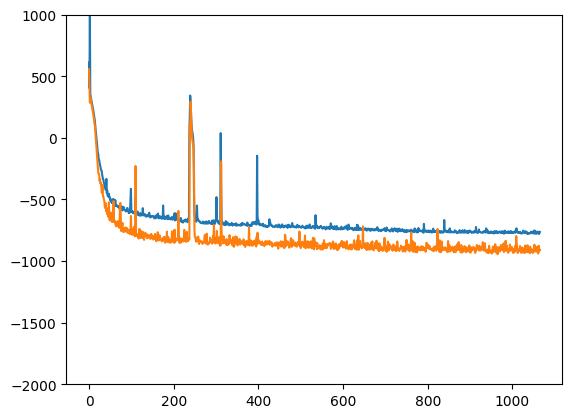

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


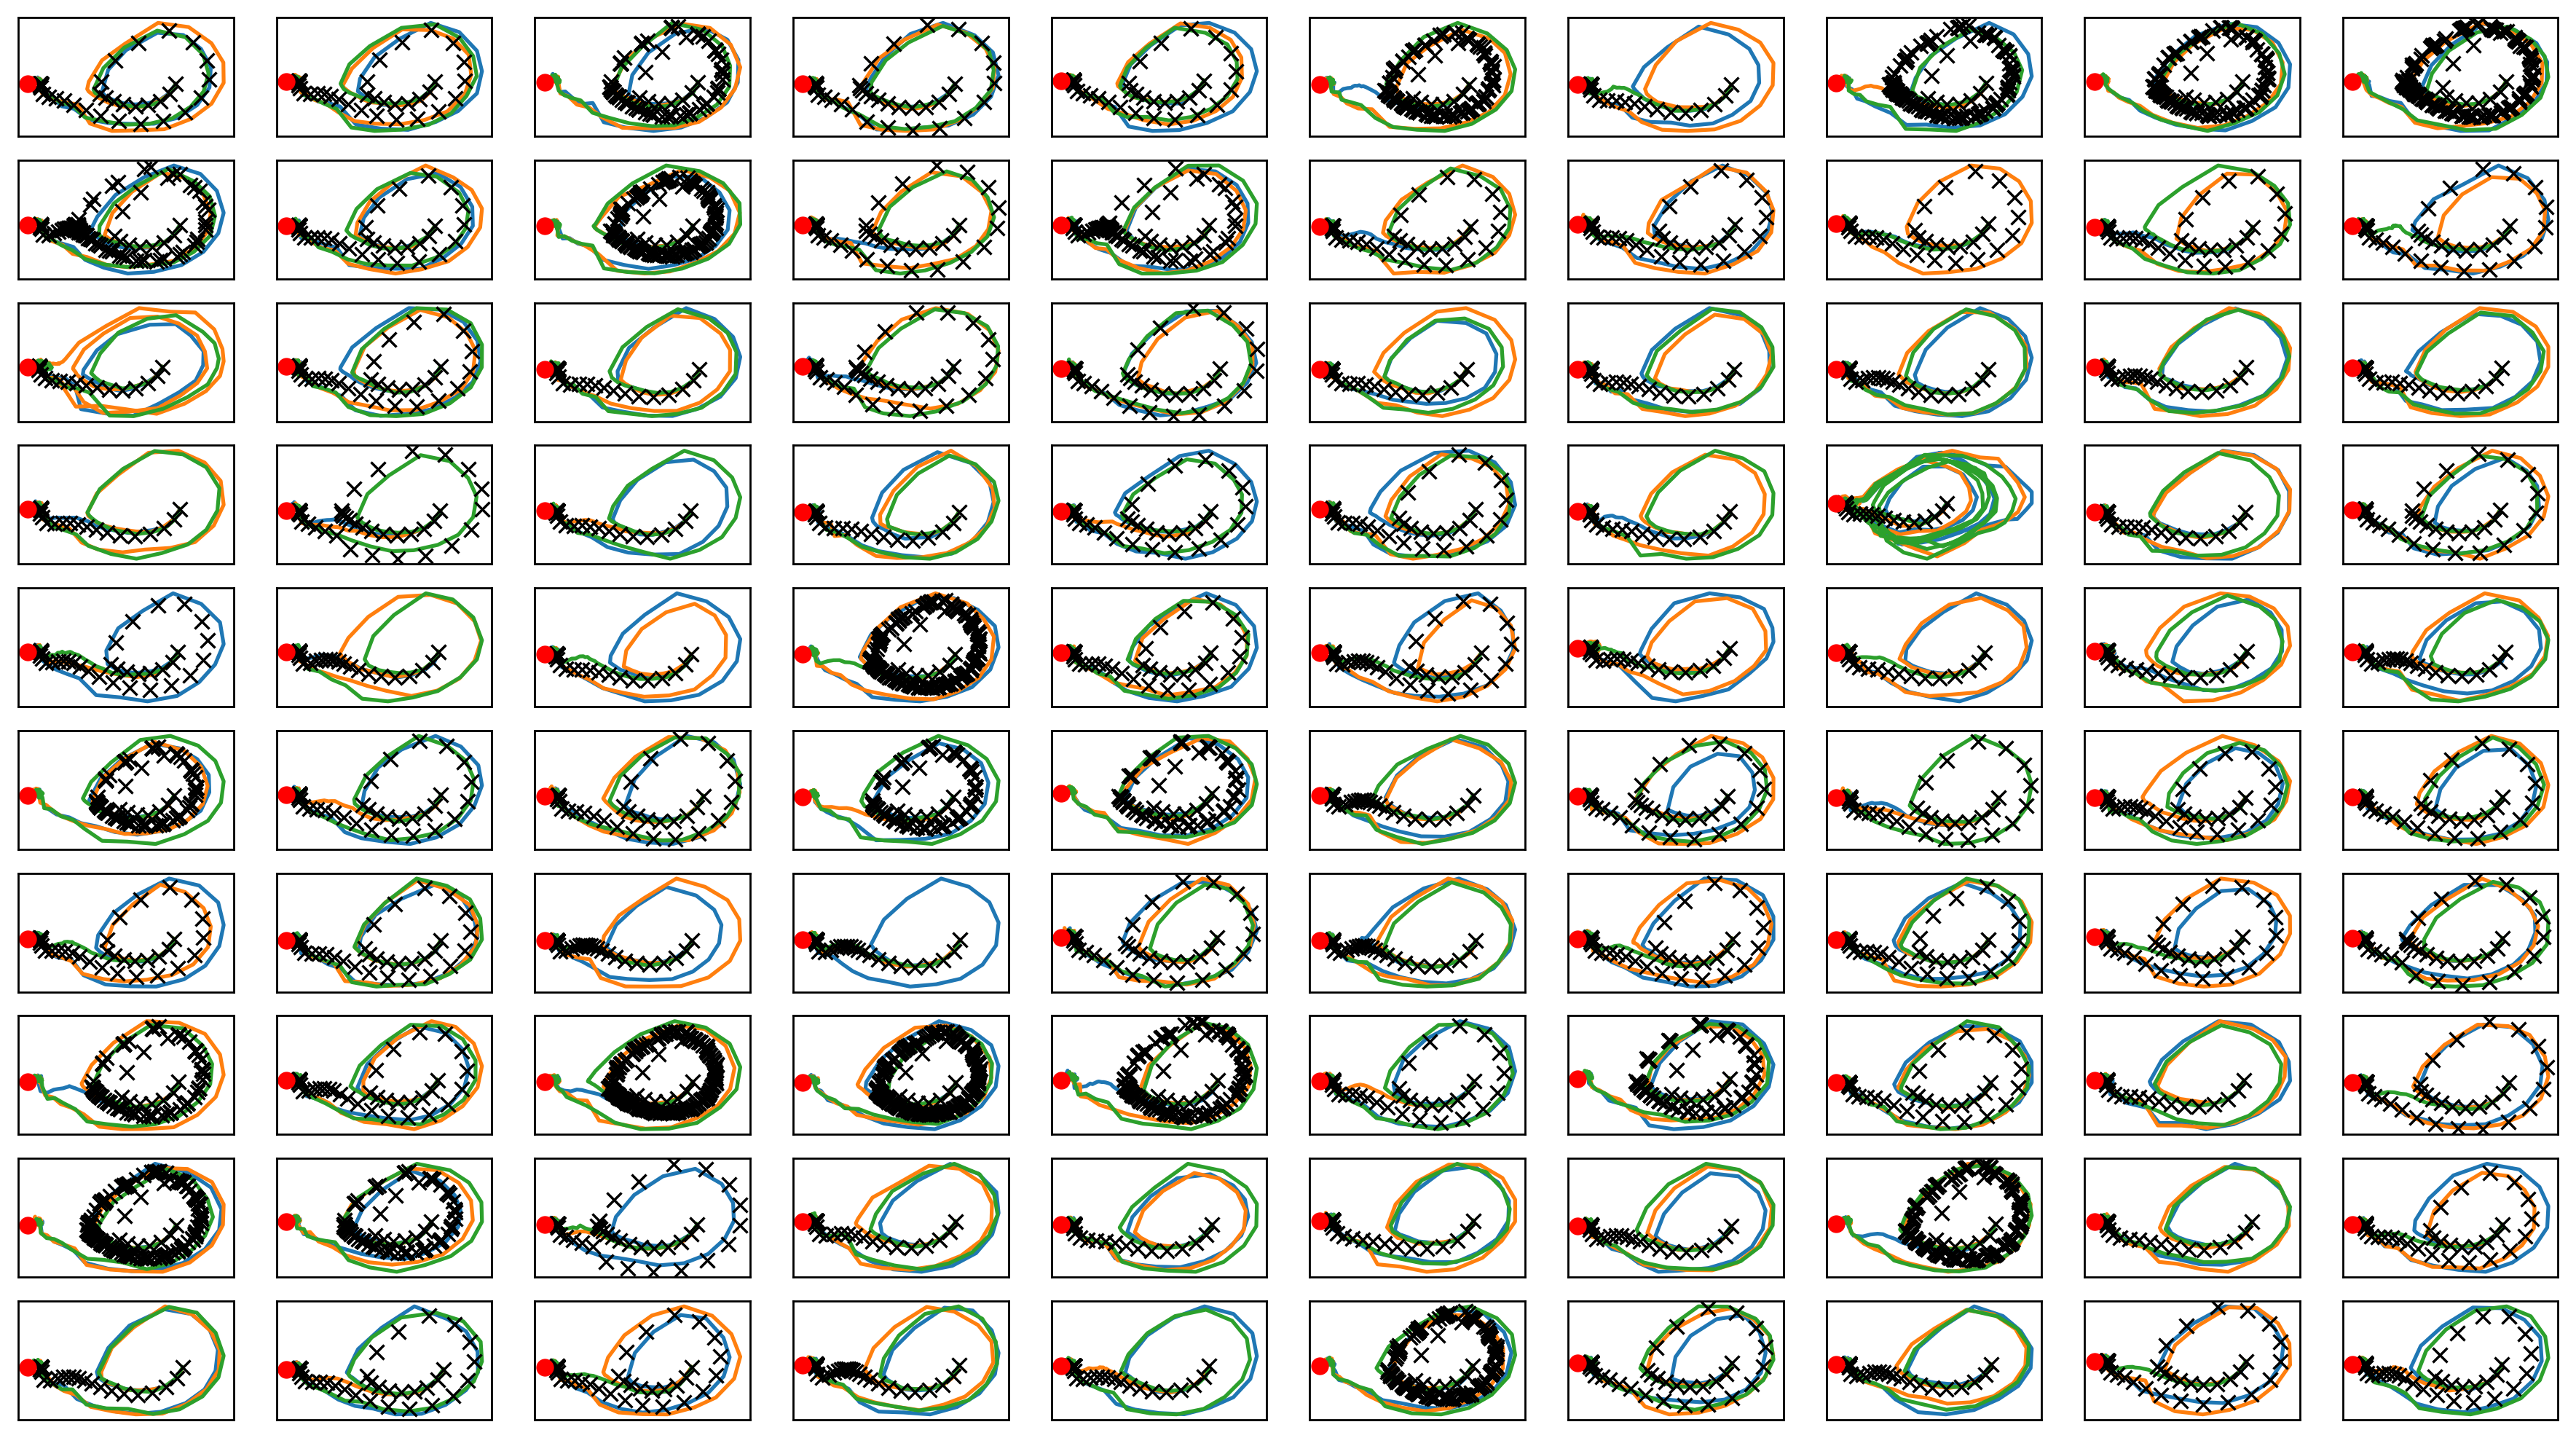

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

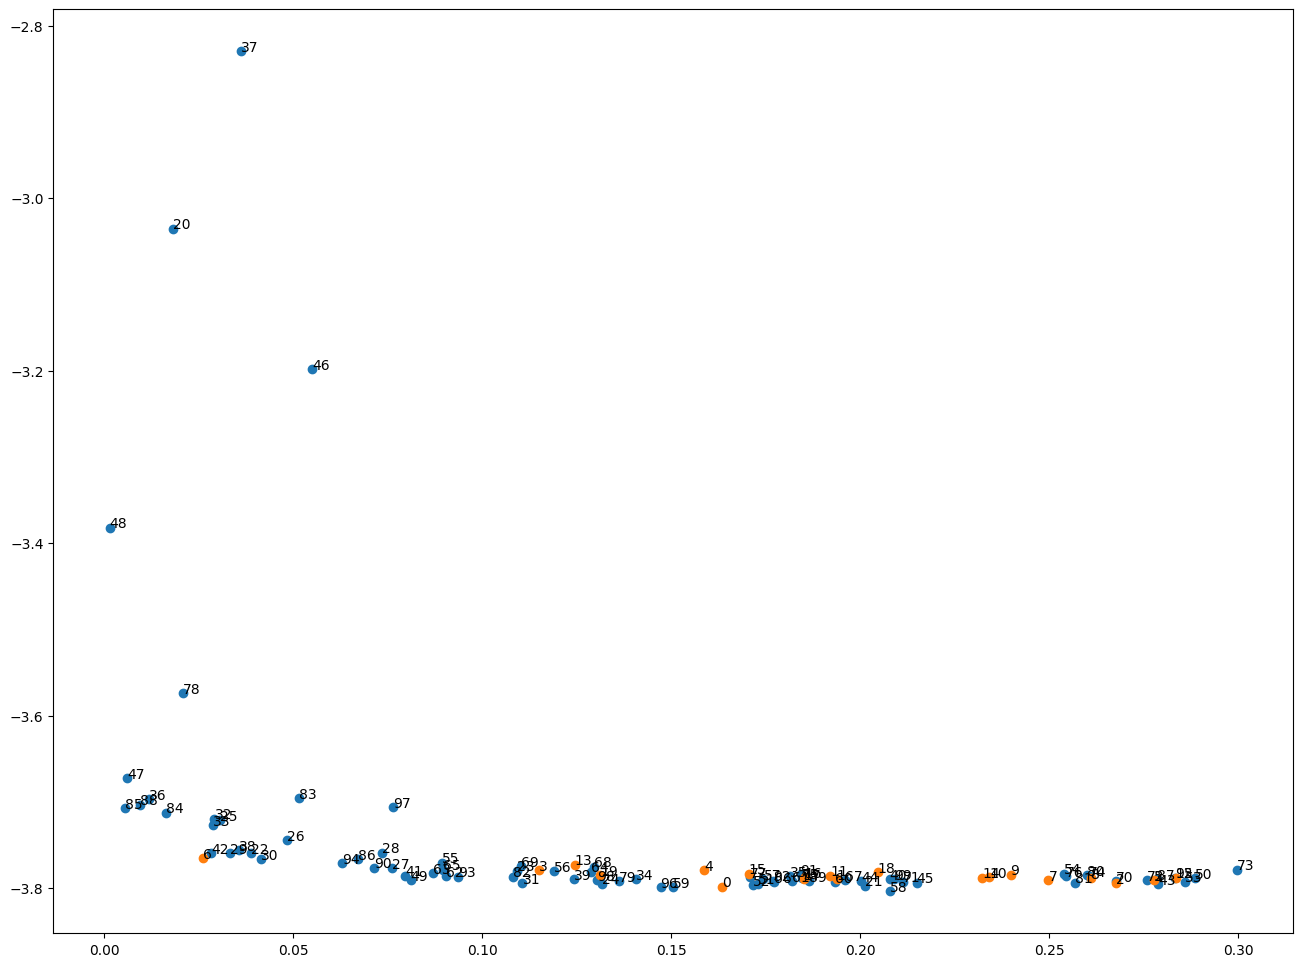

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


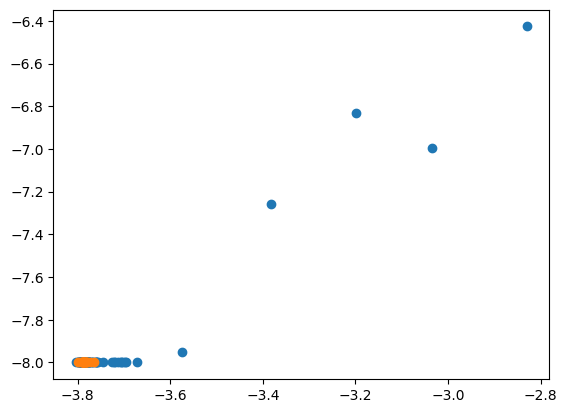

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.52924  validloss 8.09339±0.00000  bestvalidloss 8.09339  last_update 0
train: iter 1  trainloss 6.83600  validloss 7.31399±0.00000  bestvalidloss 7.31399  last_update 0
train: iter 2  trainloss 6.24642  validloss 6.65862±0.00000  bestvalidloss 6.65862  last_update 0
train: iter 3  trainloss 5.74311  validloss 6.12183±0.00000  bestvalidloss 6.12183  last_update 0
train: iter 4  trainloss 5.32182  validloss 5.61620±0.00000  bestvalidloss 5.61620  last_update 0
train: iter 5  trainloss 4.95914  validloss 5.22218±0.00000  bestvalidloss 5.22218  last_update 0
train: iter 6  trainloss 4.64138  validloss 4.87968±0.00000  bestvalidloss 4.87968  last_update 0
train: iter 7  trainloss 4.36539  validloss 4.58006±0.00000  bestvalidloss 4.58006  last_update 0
train: iter 8  trainloss 4.12107  validloss 4.30541±0.00000  bestvalidloss 4.30541  last_update 0
train: iter 9  trainloss 3.90232  validloss 4.09305±0.00000  bestvalidloss 4.09305  last_update 0
train: iter 10  trai

train: iter 87  trainloss 0.23632  validloss 0.20346±0.00000  bestvalidloss 0.20346  last_update 0
train: iter 88  trainloss 0.20364  validloss 0.16610±0.00000  bestvalidloss 0.16610  last_update 0
train: iter 89  trainloss 0.17706  validloss 0.13127±0.00000  bestvalidloss 0.13127  last_update 0
train: iter 90  trainloss 0.13591  validloss 0.09718±0.00000  bestvalidloss 0.09718  last_update 0
train: iter 91  trainloss 0.11079  validloss 0.06399±0.00000  bestvalidloss 0.06399  last_update 0
train: iter 92  trainloss 0.07764  validloss 0.02770±0.00000  bestvalidloss 0.02770  last_update 0
train: iter 93  trainloss 0.05362  validloss -0.00994±0.00000  bestvalidloss -0.00994  last_update 0
train: iter 94  trainloss 0.02647  validloss -0.03917±0.00000  bestvalidloss -0.03917  last_update 0
train: iter 95  trainloss 0.00173  validloss -0.06938±0.00000  bestvalidloss -0.06938  last_update 0
train: iter 96  trainloss -0.03486  validloss -0.10278±0.00000  bestvalidloss -0.10278  last_update 0
t

train: iter 168  trainloss -0.45855  validloss -0.79045±0.00000  bestvalidloss -0.79365  last_update 2
train: iter 169  trainloss -0.43181  validloss -0.78282±0.00000  bestvalidloss -0.79365  last_update 3
train: iter 170  trainloss -0.45308  validloss -0.78577±0.00000  bestvalidloss -0.79365  last_update 4
train: iter 171  trainloss -0.42983  validloss -0.80561±0.00000  bestvalidloss -0.80561  last_update 0
train: iter 172  trainloss -0.42154  validloss -0.79238±0.00000  bestvalidloss -0.80561  last_update 1
train: iter 173  trainloss -0.41240  validloss -0.79626±0.00000  bestvalidloss -0.80561  last_update 2
train: iter 174  trainloss -0.41614  validloss -0.80248±0.00000  bestvalidloss -0.80561  last_update 3
train: iter 175  trainloss -0.43833  validloss -0.79604±0.00000  bestvalidloss -0.80561  last_update 4
train: iter 176  trainloss -0.40165  validloss -0.79735±0.00000  bestvalidloss -0.80561  last_update 5
train: iter 177  trainloss -0.41330  validloss -0.80103±0.00000  bestvali

train: iter 249  trainloss -0.38457  validloss -0.86520±0.00000  bestvalidloss -0.87502  last_update 1
train: iter 250  trainloss -0.41680  validloss -0.86685±0.00000  bestvalidloss -0.87502  last_update 2
train: iter 251  trainloss -0.42396  validloss -0.86721±0.00000  bestvalidloss -0.87502  last_update 3
train: iter 252  trainloss -0.42456  validloss -0.85612±0.00000  bestvalidloss -0.87502  last_update 4
train: iter 253  trainloss -0.41628  validloss -0.87421±0.00000  bestvalidloss -0.87502  last_update 5
train: iter 254  trainloss -0.42311  validloss -0.87828±0.00000  bestvalidloss -0.87828  last_update 0
train: iter 255  trainloss -0.41393  validloss -0.87261±0.00000  bestvalidloss -0.87828  last_update 1
train: iter 256  trainloss -0.43574  validloss -0.87730±0.00000  bestvalidloss -0.87828  last_update 2
train: iter 257  trainloss -0.40615  validloss -0.86738±0.00000  bestvalidloss -0.87828  last_update 3
train: iter 258  trainloss -0.42582  validloss -0.87367±0.00000  bestvali

train: iter 332  trainloss -0.40640  validloss -0.87524±0.00000  bestvalidloss -0.88969  last_update 62
train: iter 333  trainloss -0.46368  validloss -0.86010±0.00000  bestvalidloss -0.88969  last_update 63
train: iter 334  trainloss -0.42137  validloss -0.87989±0.00000  bestvalidloss -0.88969  last_update 64
train: iter 335  trainloss -0.47585  validloss -0.86612±0.00000  bestvalidloss -0.88969  last_update 65
train: iter 336  trainloss -0.43262  validloss -0.87557±0.00000  bestvalidloss -0.88969  last_update 66
train: iter 337  trainloss -0.42876  validloss -0.87504±0.00000  bestvalidloss -0.88969  last_update 67
train: iter 338  trainloss -0.42989  validloss -0.88506±0.00000  bestvalidloss -0.88969  last_update 68
train: iter 339  trainloss -0.41862  validloss -0.85339±0.00000  bestvalidloss -0.88969  last_update 69
train: iter 340  trainloss -0.43712  validloss -0.87930±0.00000  bestvalidloss -0.88969  last_update 70
train: iter 341  trainloss -0.40357  validloss -0.88832±0.00000 

train: iter 414  trainloss -0.46577  validloss -0.87772±0.00000  bestvalidloss -0.89896  last_update 25
train: iter 415  trainloss -0.42581  validloss -0.88690±0.00000  bestvalidloss -0.89896  last_update 26
train: iter 416  trainloss -0.45683  validloss -0.89454±0.00000  bestvalidloss -0.89896  last_update 27
train: iter 417  trainloss -0.40532  validloss -0.88991±0.00000  bestvalidloss -0.89896  last_update 28
train: iter 418  trainloss -0.39395  validloss -0.88265±0.00000  bestvalidloss -0.89896  last_update 29
train: iter 419  trainloss -0.42019  validloss -0.87204±0.00000  bestvalidloss -0.89896  last_update 30
train: iter 420  trainloss -0.42011  validloss -0.88018±0.00000  bestvalidloss -0.89896  last_update 31
train: iter 421  trainloss -0.43184  validloss -0.87689±0.00000  bestvalidloss -0.89896  last_update 32
train: iter 422  trainloss -0.43705  validloss -0.87687±0.00000  bestvalidloss -0.89896  last_update 33
train: iter 423  trainloss -0.43352  validloss -0.89799±0.00000 

train: iter 497  trainloss -0.45243  validloss -0.88877±0.00000  bestvalidloss -0.91153  last_update 25
train: iter 498  trainloss -0.41733  validloss -0.90079±0.00000  bestvalidloss -0.91153  last_update 26
train: iter 499  trainloss -0.46502  validloss -0.89313±0.00000  bestvalidloss -0.91153  last_update 27
train: iter 500  trainloss -0.42000  validloss -0.89339±0.00000  bestvalidloss -0.91153  last_update 28
train: iter 501  trainloss -0.43766  validloss -0.88994±0.00000  bestvalidloss -0.91153  last_update 29
train: iter 502  trainloss -0.42134  validloss -0.88357±0.00000  bestvalidloss -0.91153  last_update 30
train: iter 503  trainloss -0.44036  validloss -0.88760±0.00000  bestvalidloss -0.91153  last_update 31
train: iter 504  trainloss -0.42021  validloss -0.88882±0.00000  bestvalidloss -0.91153  last_update 32
train: iter 505  trainloss -0.40733  validloss -0.89923±0.00000  bestvalidloss -0.91153  last_update 33
train: iter 506  trainloss -0.44365  validloss -0.89520±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.7415, -3.7136], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.89227  validloss 25.61497±0.00000  bestvalidloss 25.61497  last_update 0
train: iter 1  trainloss 8.89695  validloss 15.27134±0.00000  bestvalidloss 15.27134  last_update 0
train: iter 2  trainloss 4.98102  validloss 7.62139±0.00000  bestvalidloss 7.62139  last_update 0
train: iter 3  trainloss 3.68199  validloss 4.18064±0.00000  bestvalidloss 4.18064  last_update 0
train: iter 4  trainloss 3.23969  validloss 2.73350±0.00000  bestvalidloss 2.73350  last_update 0
train: iter 5  trainloss 3.06164  validloss 2.20988±0.00000  bestvalidloss 2.20988  last_update 0
train: iter 6  trainloss 2.93744  validloss 1.90514±0.00000  bestvalidloss 1.90514  last_update 0
train: iter 7  trainloss 2.81172  validloss 1.81550±0.00000  bestvalidloss 1.81550  last_update 0
train: iter 8  trainloss 2.69734  validloss 1.66597±0.00000  bestvalidloss 1.66597  last_update 0
train: iter 9  trainloss 2.61634  validloss 1.55555±0.00000  bestvalidloss 1.55555  last_update 0
train: iter 10 

train: iter 85  trainloss 2.06133  validloss 1.10926±0.00000  bestvalidloss 1.05126  last_update 31
train: iter 86  trainloss 2.07206  validloss 1.19707±0.00000  bestvalidloss 1.05126  last_update 32
train: iter 87  trainloss 2.03750  validloss 1.16813±0.00000  bestvalidloss 1.05126  last_update 33
train: iter 88  trainloss 2.04626  validloss 1.20476±0.00000  bestvalidloss 1.05126  last_update 34
train: iter 89  trainloss 2.02343  validloss 1.17770±0.00000  bestvalidloss 1.05126  last_update 35
train: iter 90  trainloss 2.05063  validloss 1.10616±0.00000  bestvalidloss 1.05126  last_update 36
train: iter 91  trainloss 2.03511  validloss 1.17473±0.00000  bestvalidloss 1.05126  last_update 37
train: iter 92  trainloss 2.03056  validloss 1.30863±0.00000  bestvalidloss 1.05126  last_update 38
train: iter 93  trainloss 2.03363  validloss 1.15166±0.00000  bestvalidloss 1.05126  last_update 39
train: iter 94  trainloss 2.04971  validloss 1.19726±0.00000  bestvalidloss 1.05126  last_update 40


train: iter 168  trainloss 1.98096  validloss 1.07522±0.00000  bestvalidloss 1.03935  last_update 28
train: iter 169  trainloss 1.98550  validloss 1.15741±0.00000  bestvalidloss 1.03935  last_update 29
train: iter 170  trainloss 1.94712  validloss 1.17686±0.00000  bestvalidloss 1.03935  last_update 30
train: iter 171  trainloss 2.00548  validloss 1.01867±0.00000  bestvalidloss 1.01867  last_update 0
train: iter 172  trainloss 1.98819  validloss 1.29460±0.00000  bestvalidloss 1.01867  last_update 1
train: iter 173  trainloss 1.97032  validloss 1.24475±0.00000  bestvalidloss 1.01867  last_update 2
train: iter 174  trainloss 1.98646  validloss 1.13872±0.00000  bestvalidloss 1.01867  last_update 3
train: iter 175  trainloss 1.95780  validloss 1.25298±0.00000  bestvalidloss 1.01867  last_update 4
train: iter 176  trainloss 1.96529  validloss 1.11490±0.00000  bestvalidloss 1.01867  last_update 5
train: iter 177  trainloss 2.00286  validloss 1.19639±0.00000  bestvalidloss 1.01867  last_update

train: iter 252  trainloss 1.89741  validloss 1.18191±0.00000  bestvalidloss 1.01867  last_update 81
train: iter 253  trainloss 1.88222  validloss 1.18325±0.00000  bestvalidloss 1.01867  last_update 82
train: iter 254  trainloss 1.84076  validloss 1.14760±0.00000  bestvalidloss 1.01867  last_update 83
train: iter 255  trainloss 1.86364  validloss 1.10630±0.00000  bestvalidloss 1.01867  last_update 84
train: iter 256  trainloss 1.85678  validloss 1.19813±0.00000  bestvalidloss 1.01867  last_update 85
train: iter 257  trainloss 1.85730  validloss 1.03173±0.00000  bestvalidloss 1.01867  last_update 86
train: iter 258  trainloss 1.82027  validloss 1.06380±0.00000  bestvalidloss 1.01867  last_update 87
train: iter 259  trainloss 1.84751  validloss 1.21770±0.00000  bestvalidloss 1.01867  last_update 88
train: iter 260  trainloss 1.85594  validloss 1.03874±0.00000  bestvalidloss 1.01867  last_update 89
train: iter 261  trainloss 1.86051  validloss 1.56099±0.00000  bestvalidloss 1.01867  last_

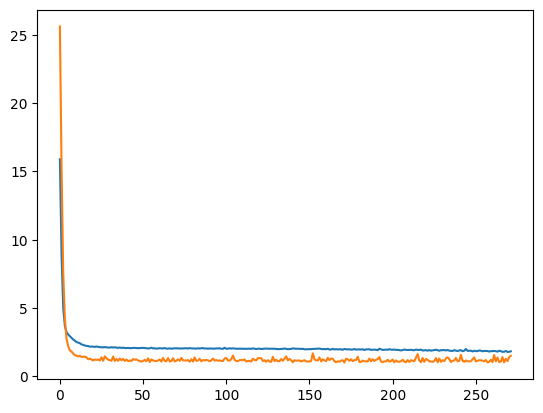

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-7.4551)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-1.3103)


In [21]:
print(vi.h_min_tilde)

-6.100384


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-2.152029375308204
tensor([-0.2473])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

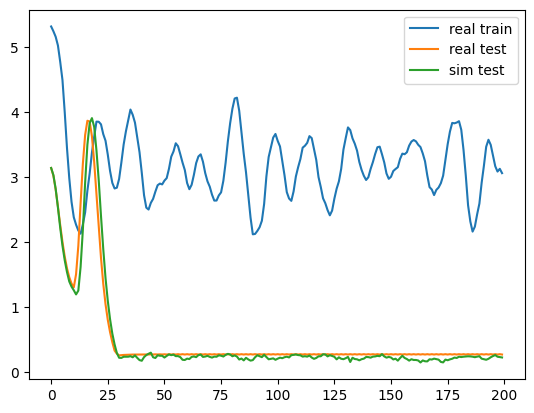

encoder [-3.7847247 -8.       ]
initial_belief tensor([-3.7415, -3.7136])
real train tensor([-3.7985, -8.0084])
real test tensor([-3.8026, -8.0038])
sim tensor([-3.7387, -3.7291])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.775510204081633


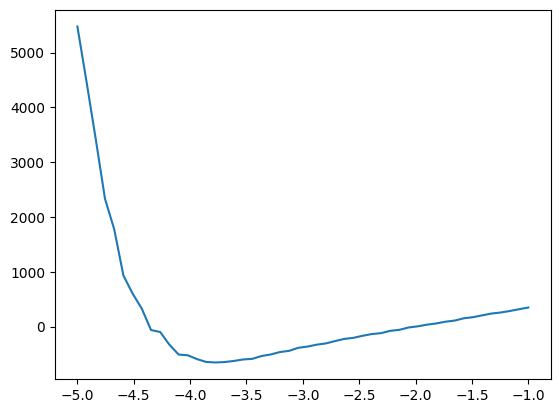

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.09063951115412522
tensor([-0.7614])
